<h1>Data Preprocessing and Visualization</h1>

<h3>Vidita Dhavane</h3>

In [1]:
#import pandas for data manipulation
import pandas as pd

In [2]:
#load the dataset into a dataframe
dataFrame=pd.read_excel("Data Science - Intern - Data Set.xlsx")
dataFrame

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,...,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,NaN,NaN,28,NaN,NaN,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,it_220403501,1709340794,19.069347,78.355141,NaN,NaN,22,NaN,NaN,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,it_220403501,1709340857,19.069414,78.355179,NaN,NaN,25,NaN,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,it_220403501,1709340920,19.069258,78.355225,NaN,NaN,35,NaN,NaN,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,it_220403501,1709340983,19.069094,78.355339,NaN,NaN,0,NaN,NaN,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,it_220403501,1713635865,18.869371,79.020393,NaN,NaN,50,NaN,NaN,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18430,it_220403501,1713635929,18.867130,79.018272,NaN,NaN,0,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18431,it_220403501,1713635993,18.862076,79.013924,NaN,NaN,10,NaN,NaN,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18432,it_220403501,1713636056,18.859493,79.011673,NaN,NaN,52,NaN,NaN,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8


In [3]:
#overview of the dataset
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Columns: 141 entries, uniqueid to adblue_level
dtypes: float64(122), int64(13), object(6)
memory usage: 19.8+ MB


In [4]:
#see the datatypes for each column
dataFrame.dtypes

uniqueid                          object
ts                                 int64
lat                              float64
lng                              float64
external_bat_voltage             float64
                                  ...   
boost_pressure                   float64
intake_manifold_1_temperature    float64
air_inlet_pressure               float64
exhaust_gas_temperature          float64
adblue_level                     float64
Length: 141, dtype: object

In [5]:
#check the number of rows and columns
print("Number of rows in dataset are :" ,dataFrame.shape[0])
print("Number of columns in dataset are :",dataFrame.shape[1])

Number of rows in dataset are : 18434
Number of columns in dataset are : 141


In [6]:
#check for null values
dataFrame.isnull().sum()

uniqueid                             0
ts                                   0
lat                                  0
lng                                  0
external_bat_voltage             18434
                                 ...  
boost_pressure                   18434
intake_manifold_1_temperature    18434
air_inlet_pressure               18434
exhaust_gas_temperature          18434
adblue_level                      3664
Length: 141, dtype: int64

<h1>Data Cleaning</h1>

In [7]:
#drop the entire column if it has null values or is empty
# Get the total number of rows
total_rows = len(dataFrame)

# Identify columns with all values as null
columns_to_drop = dataFrame.columns[dataFrame.isnull().sum() == total_rows]

# Drop those columns
dataFrame_cleaned = dataFrame.drop(columns=columns_to_drop)

print("Dropped columns:", columns_to_drop)


Dropped columns: Index(['external_bat_voltage', 'internal_bat_voltage', 'tanklevel', 'throttle',
       'intakeairtemp', 'imap', 'warmups', 'maf', 'fuelrail', 'mil',
       ...
       'request_id', 'live_location', 'to_be_expired_at', 'status', 'event_id',
       'particulated_trap_inlet_pressure', 'boost_pressure',
       'intake_manifold_1_temperature', 'air_inlet_pressure',
       'exhaust_gas_temperature'],
      dtype='object', length=108)


In [8]:
#check if the columns have been dropped successfully
dataFrame_cleaned

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,100.0,102,215,0,1,102,Released,Released,Pressed,NaN
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,99.6,102,215,19,2,102,Released,Pressed,Pressed,NaN
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,99.6,102,215,0,1,102,Pressed,Pressed,Released,NaN
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,99.6,102,215,28,2,102,Released,Pressed,Released,NaN
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,100.0,102,215,1,2,102,Released,Pressed,Released,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,it_220403501,1713635865,18.869371,79.020393,50,89,1774.9688,14.28125,945.125,71872976,...,100.0,102,215,34,2,102,Released,Pressed,Released,60.8
18430,it_220403501,1713635929,18.867130,79.018272,0,92,1774.9688,38.28125,1130.750,71873344,...,100.0,102,215,0,2,102,Released,Pressed,Released,60.8
18431,it_220403501,1713635993,18.862076,79.013924,10,87,1774.9688,32.34375,749.750,71874064,...,100.0,102,215,0,1,102,Released,Pressed,Released,60.8
18432,it_220403501,1713636056,18.859493,79.011673,52,87,1774.9688,17.71875,820.625,71874464,...,100.0,102,215,46,9,102,Released,Pressed,Released,60.8


In [9]:
#check if the previous step has been executed successfully
dataFrame_cleaned.isnull().sum()

uniqueid                                   0
ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
engineoiltemp                              0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                   14
engine_torque_percent                      0
selected_gear                              0
current_gear                               0
fuel_consumption                           0
fuel_level                                 2
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
pluscode                                   0
vibration_status                           0
can_raw_da

In [10]:
# Get the number of unique values in each column , if there is only 1 unique value in a column simply drop that as it won't provide any insights
unique_values_per_column = dataFrame_cleaned.nunique()
print(unique_values_per_column)

uniqueid                                    1
ts                                      18434
lat                                     15917
lng                                     15255
engineload                                101
coolant                                    68
engineoiltemp                               1
vehiclespeed                             3692
rpm                                      5600
obddistance                             16747
runtime                                  6295
engine_torque_percent                      81
selected_gear                               1
current_gear                               20
fuel_consumption                         6223
fuel_level                                250
fl_level                                  251
fuel_rate                                 573
fuel_economy                             6339
accelerator_pedal_pos                     251
pluscode                                 2639
vibration_status                  

In [11]:
# Count the number of zeros in each column
zero_counts = (dataFrame_cleaned == 0).sum()
print(zero_counts)


uniqueid                                    0
ts                                          0
lat                                        30
lng                                        30
engineload                               2817
coolant                                     0
engineoiltemp                               0
vehiclespeed                             2237
rpm                                      1133
obddistance                                 0
runtime                                     0
engine_torque_percent                    2201
selected_gear                               0
current_gear                             5340
fuel_consumption                            0
fuel_level                                  0
fl_level                                    2
fuel_rate                                2733
fuel_economy                             1080
accelerator_pedal_pos                    8006
pluscode                                    0
vibration_status                  

<h2>Statistical Analysis</h2>

In [12]:
import numpy as np
#replace zeros in lat and lgn column with mean

columns_to_fill = ['lat', 'lng']
mean_values = dataFrame_cleaned[columns_to_fill].replace(0, np.nan).mean()
dataFrame_cleaned[columns_to_fill] = dataFrame_cleaned[columns_to_fill].replace(0, mean_values)


In [13]:
# Calculate the median of non-zero values and fill colimn currect_gear
median_gear = dataFrame_cleaned[dataFrame_cleaned['current_gear'] != 0]['current_gear'].median()
dataFrame_cleaned['current_gear'] = dataFrame_cleaned['current_gear'].replace(0, median_gear)


In [14]:
# Calculate the mean of non-zero values
mean_engineload = dataFrame_cleaned[dataFrame_cleaned['engineload'] != 0]['engineload'].mean()
dataFrame_cleaned['engineload'] = dataFrame_cleaned['engineload'].replace(0, mean_engineload)


In [15]:
# Find indices where 'fuel_economy'  0
indices_to_drop = dataFrame_cleaned[dataFrame_cleaned['fuel_economy'] == 0].index
dataFrame_cleaned = dataFrame_cleaned.drop(indices_to_drop)


In [16]:
#drop all the column which have only 1 unique value  
dataFrame_cleaned=dataFrame_cleaned.drop(['uniqueid','engineoiltemp','selected_gear','engine_throttle_valve2_pos','enginefueltemp','accelerator_pedal_pos_2','vibration_status'],axis='columns')

In [17]:
print("Number of rows in dataset after cleaning are :" ,dataFrame_cleaned.shape[0])
print("Number of columns in dataset after cleaning are :",dataFrame_cleaned.shape[1])

Number of rows in dataset after cleaning are : 17354
Number of columns in dataset after cleaning are : 26


In [18]:
#check for duplicates
duplicates = dataFrame_cleaned.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


<h2>Overview of the statistical properties</h2>

In [19]:
#check the overall statistics of the data
dataFrame_cleaned.describe()

,ts,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,...,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,adblue_level
count,1.735400e+04,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,1.735400e+04,17342.000000,17354.000000,...,17354.000000,17352.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,13893.000000
mean,1.711640e+09,18.751160,78.992325,46.392505,85.033652,35.433739,948.176357,6.649797e+07,2132.330588,28.792440,...,19532.412902,55.129299,201.198752,9.654786,26.587377,37.042296,99.641604,29.718797,5.225539,84.776362
std,1.278968e+06,0.304981,0.385512,25.183278,7.043764,16.376169,333.256477,3.263905e+06,92.670827,22.968699,...,921.283231,26.733201,97.594468,8.332249,44.193564,34.974788,4.033223,28.850816,5.312714,15.567798
min,1.709341e+09,17.317802,78.118828,1.000000,36.000000,0.000000,0.000000,6.078080e+07,1970.850000,0.000000,...,17936.000000,0.400000,0.000000,0.000000,0.001953,0.000000,21.200000,0.000000,1.000000,44.400000
25%,1.710902e+09,18.712359,78.761806,23.000000,84.000000,26.250000,767.125000,6.373202e+07,2053.162500,7.000000,...,18744.000000,33.200000,121.180000,1.800000,2.107910,0.000000,100.000000,0.000000,1.000000,68.800000
50%,1.711691e+09,18.848518,79.076946,45.021131,85.000000,39.500000,979.875000,6.652453e+07,2132.950000,25.500000,...,19541.250000,57.200000,208.780000,7.800000,3.816406,38.800000,100.000000,28.000000,2.000000,88.400000
75%,1.712681e+09,18.912683,79.351242,66.000000,89.000000,47.484375,1169.843750,6.940579e+07,2213.787500,49.000000,...,20340.500000,77.200000,281.780000,17.400000,24.120117,70.000000,100.000000,58.000000,9.000000,99.200000
max,1.713636e+09,19.069500,79.481766,100.000000,98.000000,81.703125,1975.250000,7.187482e+07,2287.100000,80.000000,...,21059.000000,100.000000,365.000000,36.400000,125.500000,100.000000,100.000000,83.000000,15.000000,100.000000


<h1>Feature Engineering</h1>

In [20]:
#convert the ts column to date and time
from datetime import datetime

# Assuming you have a DataFrame named `dataFrame_cleaned` with a column `ts`
# Convert 'ts' from Unix timestamp to datetime
dataFrame_cleaned['ts_converted'] = pd.to_datetime(dataFrame_cleaned['ts'], unit='s')

# Print the first few rows to verify
print(dataFrame_cleaned[['ts', 'ts_converted']].head())


           ts        ts_converted
2  1709340857 2024-03-02 00:54:17
3  1709340920 2024-03-02 00:55:20
4  1709340983 2024-03-02 00:56:23
5  1709341725 2024-03-02 01:08:45
6  1709344633 2024-03-02 01:57:13


In [21]:
#extract the date only from date time format
#dataFrame_cleaned['ts_converted'] = dataFrame_cleaned['ts_converted'].dt.date
dataFrame_cleaned['ts_converted'] = dataFrame_cleaned['ts_converted'].dt.strftime('%m/%d/%Y')


In [22]:
dataFrame_cleaned

,ts,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,...,pluscode,can_raw_data,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level,ts_converted
2,1709340857,19.069414,78.355179,25.000000,48,1.40625,752.625,60780800,1970.85,18,...,7JFW3994+,"0CF00300:D10019FFFF4C4983,0CF00400:307D8F85170...",99.6,0,1,Pressed,Pressed,Released,NaN,03/02/2024
3,1709340920,19.069258,78.355225,35.000000,52,2.81250,996.375,60780820,1970.90,27,...,7JFW3994+,"0CF00300:D05423FFFF4C4C82,0CF00400:519998231F0...",99.6,28,2,Released,Pressed,Released,NaN,03/02/2024
4,1709340983,19.069094,78.355339,45.021131,57,4.53125,1065.750,60780840,1970.90,1,...,7JFW3994+,"0CF00300:D10800FFFF4C3284,0CF00400:017E7E4E210...",100.0,1,2,Released,Pressed,Released,NaN,03/02/2024
5,1709341725,19.069117,78.356079,22.000000,58,0.09375,750.750,60780920,1970.95,20,...,7JFW3994+,"0CF00300:D10016FFFF4C4D7E,0CF00400:007D9176170...",99.6,0,1,Released,Pressed,Released,NaN,03/02/2024
6,1709344633,19.069157,78.356049,45.021131,53,0.00000,0.000,60780920,1970.95,0,...,7JFW3994+,"0CF00300:D10000FFFF0C407E,0CF00400:7E7D7D00000...",100.0,0,15,Released,Released,Pressed,NaN,03/02/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,1713635865,18.869371,79.020393,50.000000,89,14.28125,945.125,71872976,2287.00,33,...,7JCXV29C+,"0CF00300:D07432FFFF0C847E,0CF00400:719F9E891D0...",100.0,34,2,Released,Pressed,Released,60.8,04/20/2024
18430,1713635929,18.867130,79.018272,45.021131,92,38.28125,1130.750,71873344,2287.05,0,...,7JCXV289+,"0CF00300:D10000FFFF0C307E,0CF00400:017D7D56230...",100.0,0,2,Released,Pressed,Released,60.8,04/20/2024
18431,1713635993,18.862076,79.013924,10.000000,87,32.34375,749.750,71874064,2287.05,7,...,7JCXV267+,"0CF00300:D1000AFFFF0C447D,0CF00400:007D846E170...",100.0,0,1,Released,Pressed,Released,60.8,04/20/2024
18432,1713636056,18.859493,79.011673,52.000000,87,17.71875,820.625,71874464,2287.05,39,...,7JCXV256+,"0CF00300:D08D34FFFF0D707E,0CF00400:38ABA4A5190...",100.0,46,9,Released,Pressed,Released,60.8,04/20/2024


In [23]:
# Identify categorical columns
categorical_columns = dataFrame_cleaned.select_dtypes(include=['object', 'category']).columns

print("Categorical columns:\n", categorical_columns)


Categorical columns:
 Index(['pluscode', 'can_raw_data', 'brake_switch_status',
       'clutch_switch_status', 'parking_switch_status', 'ts_converted'],
      dtype='object')


In [24]:
#check how many unique values are present in the specific column
unique_value_counts = dataFrame_cleaned['brake_switch_status'].value_counts()
print("Unique value counts :\n", unique_value_counts)

Unique value counts :
 brake_switch_status
Released    16090
Pressed      1264
Name: count, dtype: int64


<h2>Converting categorical values to numeric</h2>

In [25]:
#converting categorical values to numeric where released=0 and pressed=1
# Define the mapping
mapping = {'Released': 0, 'Pressed': 1}

# List of columns to apply the mapping
columns_to_replace = ['brake_switch_status', 'clutch_switch_status', 'parking_switch_status']

# Replace values in the specified columns
dataFrame_cleaned[columns_to_replace] = dataFrame_cleaned[columns_to_replace].replace(mapping)

print("Updated columns:\n", dataFrame[columns_to_replace].head())


Updated columns:
   brake_switch_status clutch_switch_status parking_switch_status
0            Released             Released               Pressed
1            Released              Pressed               Pressed
2             Pressed              Pressed              Released
3            Released              Pressed              Released
4            Released              Pressed              Released


In [26]:
dataFrame_cleaned=dataFrame_cleaned.drop(columns=['ts'])
dataFrame_cleaned

,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,current_gear,...,pluscode,can_raw_data,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level,ts_converted
2,19.069414,78.355179,25.000000,48,1.40625,752.625,60780800,1970.85,18,129,...,7JFW3994+,"0CF00300:D10019FFFF4C4983,0CF00400:307D8F85170...",99.6,0,1,1,1,0,NaN,03/02/2024
3,19.069258,78.355225,35.000000,52,2.81250,996.375,60780820,1970.90,27,129,...,7JFW3994+,"0CF00300:D05423FFFF4C4C82,0CF00400:519998231F0...",99.6,28,2,0,1,0,NaN,03/02/2024
4,19.069094,78.355339,45.021131,57,4.53125,1065.750,60780840,1970.90,1,3,...,7JFW3994+,"0CF00300:D10800FFFF4C3284,0CF00400:017E7E4E210...",100.0,1,2,0,1,0,NaN,03/02/2024
5,19.069117,78.356079,22.000000,58,0.09375,750.750,60780920,1970.95,20,129,...,7JFW3994+,"0CF00300:D10016FFFF4C4D7E,0CF00400:007D9176170...",99.6,0,1,0,1,0,NaN,03/02/2024
6,19.069157,78.356049,45.021131,53,0.00000,0.000,60780920,1970.95,0,16,...,7JFW3994+,"0CF00300:D10000FFFF0C407E,0CF00400:7E7D7D00000...",100.0,0,15,0,0,1,NaN,03/02/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,18.869371,79.020393,50.000000,89,14.28125,945.125,71872976,2287.00,33,11,...,7JCXV29C+,"0CF00300:D07432FFFF0C847E,0CF00400:719F9E891D0...",100.0,34,2,0,1,0,60.8,04/20/2024
18430,18.867130,79.018272,45.021131,92,38.28125,1130.750,71873344,2287.05,0,16,...,7JCXV289+,"0CF00300:D10000FFFF0C307E,0CF00400:017D7D56230...",100.0,0,2,0,1,0,60.8,04/20/2024
18431,18.862076,79.013924,10.000000,87,32.34375,749.750,71874064,2287.05,7,16,...,7JCXV267+,"0CF00300:D1000AFFFF0C447D,0CF00400:007D846E170...",100.0,0,1,0,1,0,60.8,04/20/2024
18432,18.859493,79.011673,52.000000,87,17.71875,820.625,71874464,2287.05,39,13,...,7JCXV256+,"0CF00300:D08D34FFFF0D707E,0CF00400:38ABA4A5190...",100.0,46,9,0,1,0,60.8,04/20/2024


In [27]:
# Calculate the mean of the 'adblue_level' column and substitute it in place of NaN
mean_value = dataFrame_cleaned['adblue_level'].mean()
dataFrame_cleaned.loc[:, 'adblue_level'] = dataFrame_cleaned['adblue_level'].fillna(mean_value)
print("NaN values in 'adblue_level' have been filled with the mean.")


NaN values in 'adblue_level' have been filled with the mean.


In [28]:
dataFrame_cleaned

,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,current_gear,...,pluscode,can_raw_data,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level,ts_converted
2,19.069414,78.355179,25.000000,48,1.40625,752.625,60780800,1970.85,18,129,...,7JFW3994+,"0CF00300:D10019FFFF4C4983,0CF00400:307D8F85170...",99.6,0,1,1,1,0,84.776362,03/02/2024
3,19.069258,78.355225,35.000000,52,2.81250,996.375,60780820,1970.90,27,129,...,7JFW3994+,"0CF00300:D05423FFFF4C4C82,0CF00400:519998231F0...",99.6,28,2,0,1,0,84.776362,03/02/2024
4,19.069094,78.355339,45.021131,57,4.53125,1065.750,60780840,1970.90,1,3,...,7JFW3994+,"0CF00300:D10800FFFF4C3284,0CF00400:017E7E4E210...",100.0,1,2,0,1,0,84.776362,03/02/2024
5,19.069117,78.356079,22.000000,58,0.09375,750.750,60780920,1970.95,20,129,...,7JFW3994+,"0CF00300:D10016FFFF4C4D7E,0CF00400:007D9176170...",99.6,0,1,0,1,0,84.776362,03/02/2024
6,19.069157,78.356049,45.021131,53,0.00000,0.000,60780920,1970.95,0,16,...,7JFW3994+,"0CF00300:D10000FFFF0C407E,0CF00400:7E7D7D00000...",100.0,0,15,0,0,1,84.776362,03/02/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,18.869371,79.020393,50.000000,89,14.28125,945.125,71872976,2287.00,33,11,...,7JCXV29C+,"0CF00300:D07432FFFF0C847E,0CF00400:719F9E891D0...",100.0,34,2,0,1,0,60.800000,04/20/2024
18430,18.867130,79.018272,45.021131,92,38.28125,1130.750,71873344,2287.05,0,16,...,7JCXV289+,"0CF00300:D10000FFFF0C307E,0CF00400:017D7D56230...",100.0,0,2,0,1,0,60.800000,04/20/2024
18431,18.862076,79.013924,10.000000,87,32.34375,749.750,71874064,2287.05,7,16,...,7JCXV267+,"0CF00300:D1000AFFFF0C447D,0CF00400:007D846E170...",100.0,0,1,0,1,0,60.800000,04/20/2024
18432,18.859493,79.011673,52.000000,87,17.71875,820.625,71874464,2287.05,39,13,...,7JCXV256+,"0CF00300:D08D34FFFF0D707E,0CF00400:38ABA4A5190...",100.0,46,9,0,1,0,60.800000,04/20/2024


<h1>Exploratory Data Analysis</h1>

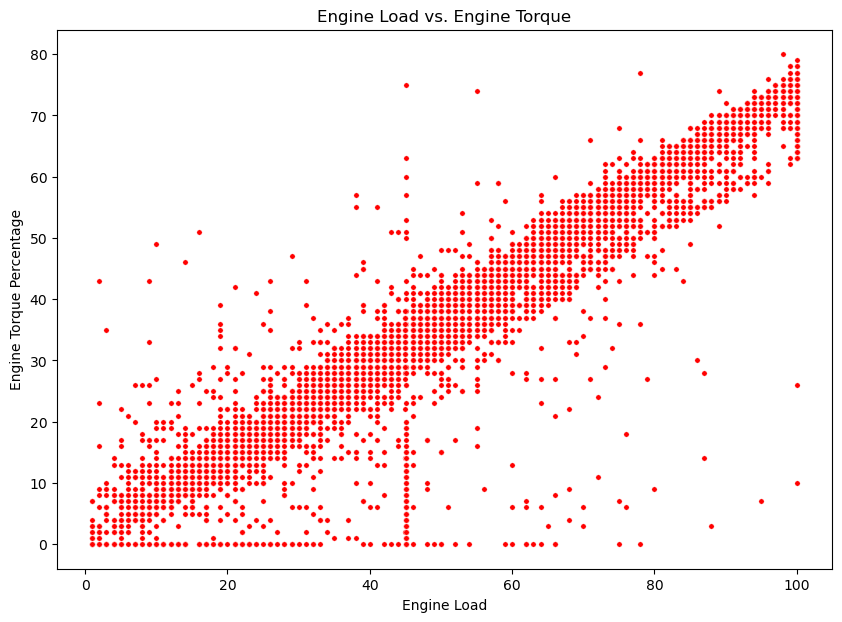

In [29]:
#Analyzing vehicle performance and efficiency by using the below two columns 
#Engine Load and Torque
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(data=dataFrame_cleaned, x='engineload', y='engine_torque_percent',color='red',s=15)
plt.title('Engine Load vs. Engine Torque')
plt.xlabel('Engine Load')
plt.ylabel('Engine Torque Percentage')
plt.show()

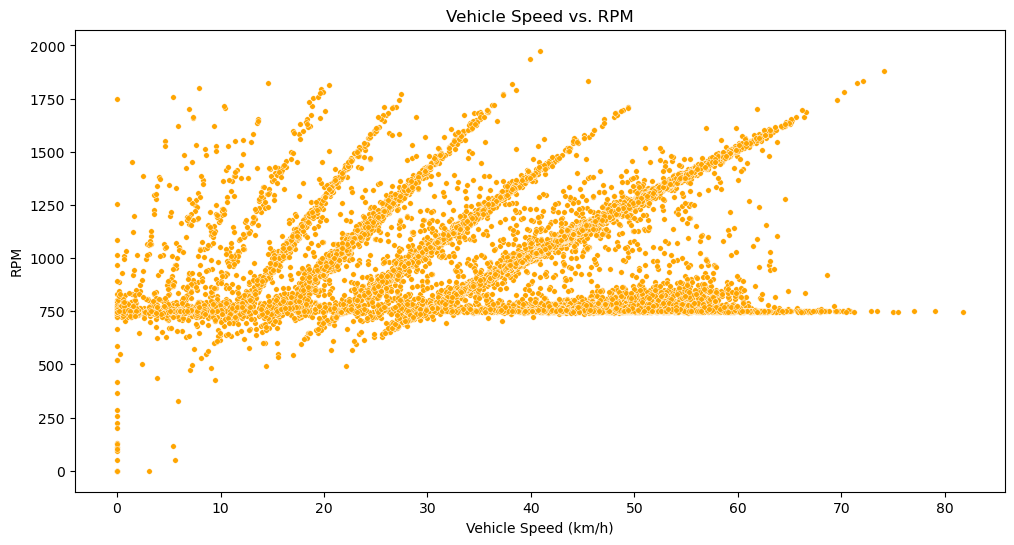

In [30]:
# Vehicle Speed vs. RPM
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataFrame_cleaned, x='vehiclespeed', y='rpm',color='orange',s=16)
plt.title('Vehicle Speed vs. RPM')
plt.xlabel('Vehicle Speed (km/h)')
plt.ylabel('RPM')
plt.show()


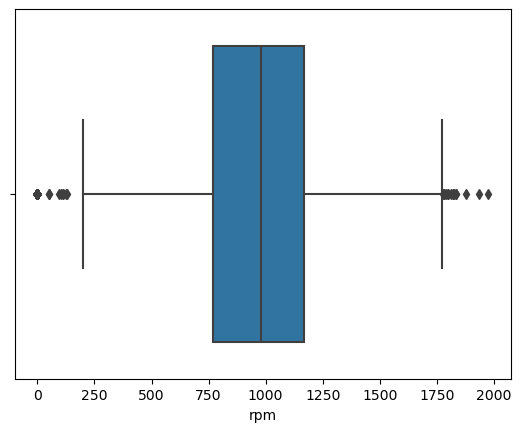

In [31]:
#Detecting outliers in Engine Data using boxplots which could indicate mechanical issues or unusual driving behavior. i.e outliers
sns.boxplot(x=dataFrame_cleaned['rpm'])
plt.show()


C:\Users\Vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


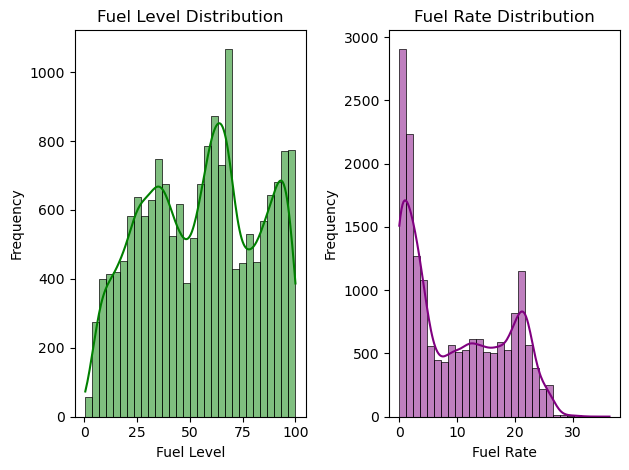

In [32]:
#distribution of fuel_level and fuel_rate across your dataset

# Fuel Level Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=dataFrame_cleaned, x='fuel_level', bins=30, kde=True, color='green')
plt.title('Fuel Level Distribution')
plt.xlabel('Fuel Level')
plt.ylabel('Frequency')

# Fuel Rate Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=dataFrame_cleaned, x='fuel_rate', bins=30, kde=True, color='purple')
plt.title('Fuel Rate Distribution')
plt.xlabel('Fuel Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



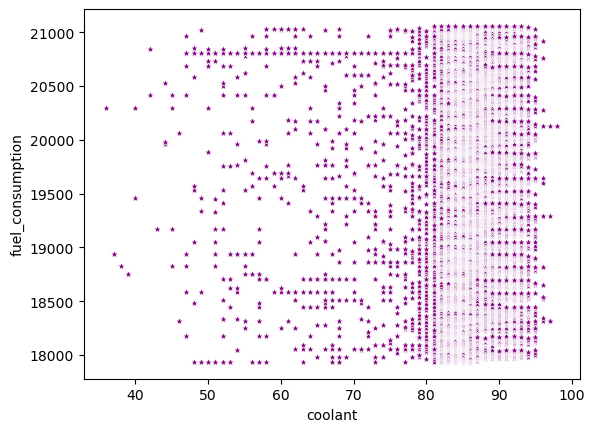

In [33]:
#Impact of Environmental Factors
#Coolant Temperature and Engine Performance: Exploring the relationship between coolant temperature and fuel_consumption

sns.scatterplot(x='coolant', y='fuel_consumption', data=dataFrame_cleaned, marker='*',color='purple')
plt.show()


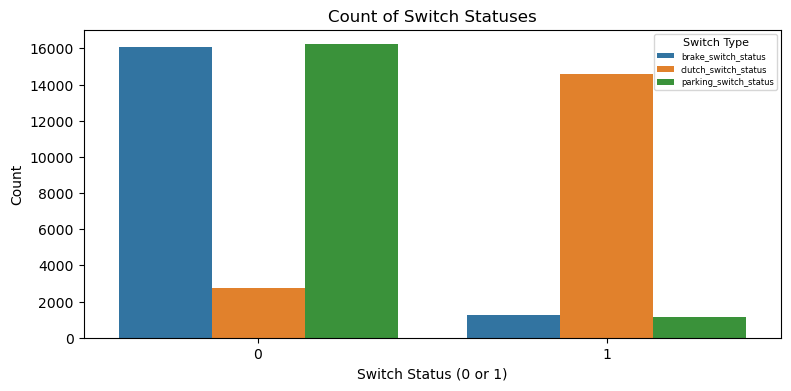

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the counts of 0 and 1 for each column
status_counts = {
    'brake_switch_status': dataFrame_cleaned['brake_switch_status'].value_counts(),
    'clutch_switch_status': dataFrame_cleaned['clutch_switch_status'].value_counts(),
    'parking_switch_status': dataFrame_cleaned['parking_switch_status'].value_counts()
}

# Convert to DataFrame for easier plotting
status_df = pd.DataFrame(status_counts).fillna(0).astype(int)
status_df = status_df.reset_index().melt(id_vars='index', var_name='Status Type', value_name='Count')
status_df.columns = ['Switch Status', 'Status Type', 'Count']

# Plot
plt.figure(figsize=(9, 4))
sns.barplot(data=status_df, x='Switch Status', y='Count', hue='Status Type')
plt.title('Count of Switch Statuses')
plt.xlabel('Switch Status (0 or 1)')
plt.ylabel('Count')
plt.legend(title='Switch Type' ,title_fontsize='8', fontsize='6')
plt.show()


C:\Users\Vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


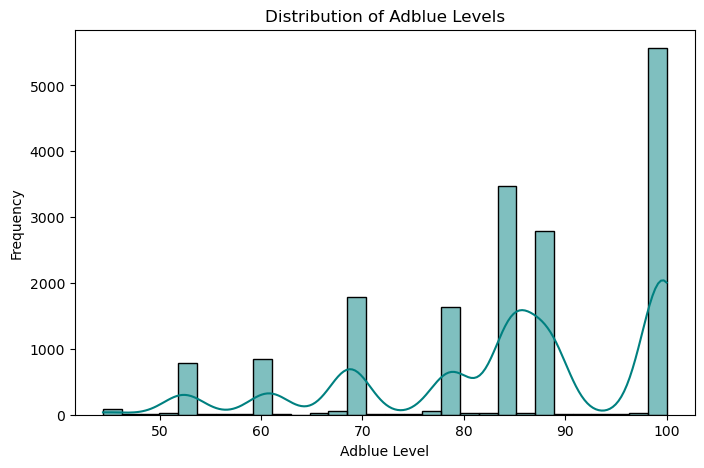

In [35]:
#The distribution, trends, and relationships of Adblue Level in the dataset. 

plt.figure(figsize=(8, 5))
sns.histplot(dataFrame_cleaned['adblue_level'].dropna(), bins=30, kde=True,color='teal')
plt.title('Distribution of Adblue Levels')
plt.xlabel('Adblue Level')
plt.ylabel('Frequency')
plt.show()


In [37]:
#saved the file to perform further analysis in PowerBI
dataFrame_cleaned.to_excel('C:/Users/Vivek\Desktop/Taabi mobolity/dataFrame_cleanedm.xlsx', index=False)
